<a href="https://colab.research.google.com/github/giovanni-lucarelli/distribution-shift/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Set seed for reproducibility
np.random.seed(42)

# Parameters for the multivariate normal distribution
mean = np.zeros(7)  # Mean vector (7 dimensions)
cov = np.eye(7)    # Identity covariance matrix (7x7)

# Number of samples
N = 1000

# Generate samples
X = np.random.multivariate_normal(mean, cov, N)

# Define the polynomial function (no interactions)
def polynomial_features(X):
    return np.column_stack([np.ones(len(X)), X, X**2]) # bias, linear and quadratic

# Define the logistic (sigmoid) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the deterministic weights for the polynomial features (bias, linear terms, quadratic terms)
# Adjusted weights to match the number of features generated by polynomial_features
weights = np.array([0.1, 0.2, -0.3, 0.4, -0.5, 0.6, -0.7,
                   0.05, -0.06, 0.07, -0.08, 0.09, -0.1, 0.11, -0.01]) #15 weights: 1 for the bias + 7 linear + 7 quadratic


# Generate polynomial features
X_poly = polynomial_features(X)


# Compute the linear combination of features and weights
z = np.dot(X_poly, weights)

# Apply the sigmoid function to get probabilities
probabilities = sigmoid(z)

# Generate the target variable y based on the probabilities (0 or 1)
y = np.random.binomial(1, probabilities)

# Create a Pandas DataFrame for the generated data
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(7)])
df['target'] = y

print(df.head())
print(df['target'].value_counts())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1   0.767435  -0.469474   0.542560  -0.463418  -0.465730   0.241962   
2  -1.724918  -0.562288  -1.012831   0.314247  -0.908024  -1.412304   
3  -0.225776   0.067528  -1.424748  -0.544383   0.110923  -1.150994   
4  -0.600639  -0.291694  -0.601707   1.852278  -0.013497  -1.057711   

   feature_7  target  
0   1.579213       0  
1  -1.913280       1  
2   1.465649       0  
3   0.375698       1  
4   0.822545       1  
target
1    529
0    471
Name: count, dtype: int64


Miscela statistica della multivariata precedente e di una nuova e predizioni deterministiche sul nuovo sample (stessa sigmoide, stessa polinomiale)

In [ ]:
# Parameters for the first multivariate normal distribution
mean1 = np.zeros(7)  # Mean vector (7 dimensions)
cov1 = np.eye(7)    # Identity covariance matrix (7x7)

# Parameters for the second multivariate normal distribution
mean2 = np.ones(7) * 3  # Mean vector (7 dimensions)
cov2 = np.eye(7) * 2  # Scaled identity covariance matrix (7x7)


# Mixing probability
pi = 0.7  # Probability of drawing from the first distribution

# Number of samples
N = 1000

# Generate samples
samples = np.random.choice([0, 1], size=N, p=[pi, 1-pi]) #0 for the first distribution and 1 for the second distribution
X = np.zeros((N,7))
for i in range(N):
  if samples[i] == 0:
    X[i] = np.random.multivariate_normal(mean1, cov1)
  else:
    X[i] = np.random.multivariate_normal(mean2, cov2)


# Generate polynomial features
X_poly = polynomial_features(X)


# Compute the linear combination of features and weights
z = np.dot(X_poly, weights)

# Apply the sigmoid function to get probabilities
probabilities = sigmoid(z)

# Generate the target variable y based on the probabilities (0 or 1)
y = np.random.binomial(1, probabilities)

# Create a Pandas DataFrame for the generated data
df1 = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(7)])
df1['target'] = y

print(df1.head())
print(df1['target'].value_counts())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.488883   3.488489   2.456685   1.922181   6.657121   3.592627   
1   1.137777  -1.421350   1.752292  -2.508957  -0.768766  -0.459032   
2   3.309314   2.764088   2.983033   1.616867   0.882594   4.027443   
3   1.584494  -0.790017   0.692815  -0.283707   1.190475   1.021963   
4   2.519832   4.358963   3.914861   2.032055   1.122209   2.591953   

   feature_7  target  
0   3.867288       0  
1   0.581723       1  
2   3.981049       0  
3   0.211209       1  
4   5.143119       0  
target
1    507
0    493
Name: count, dtype: int64


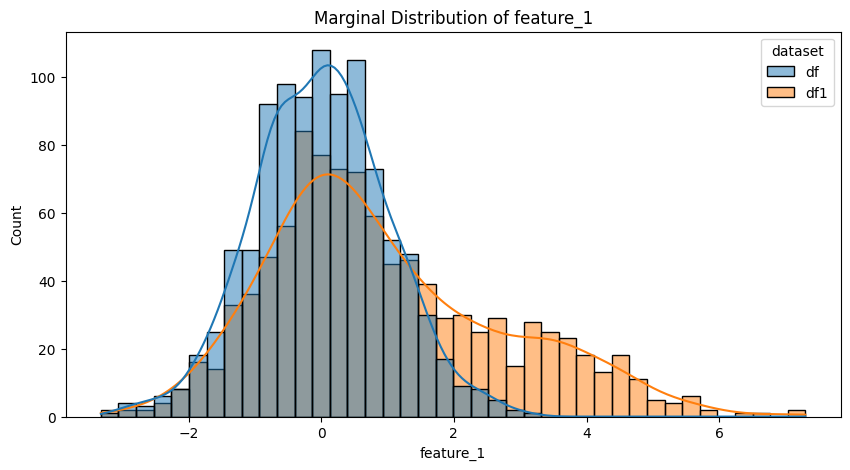

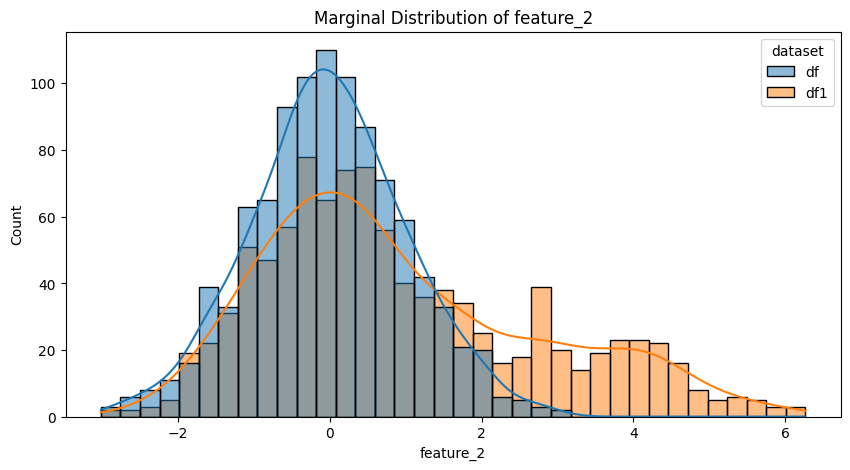

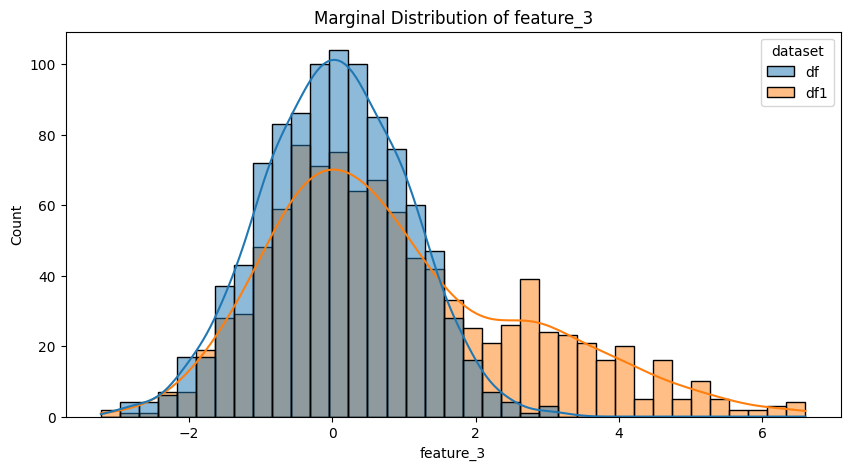

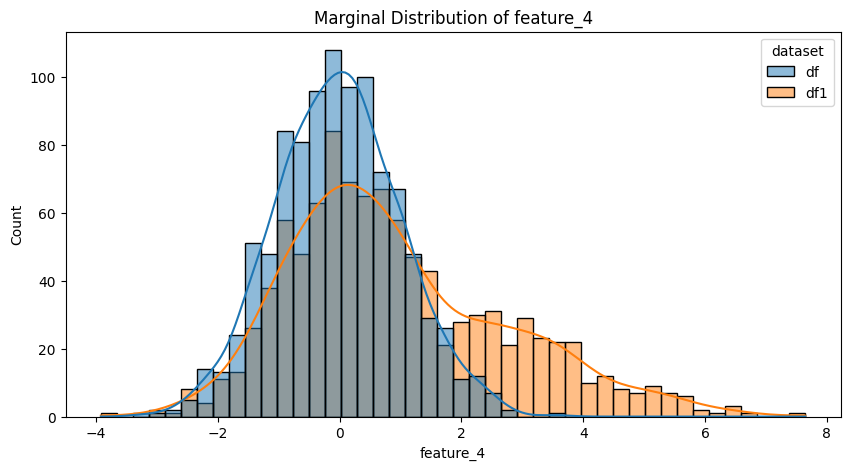

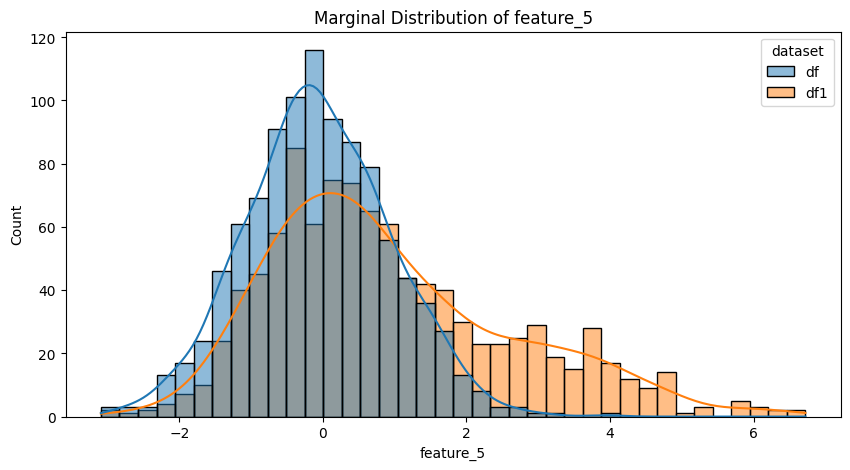

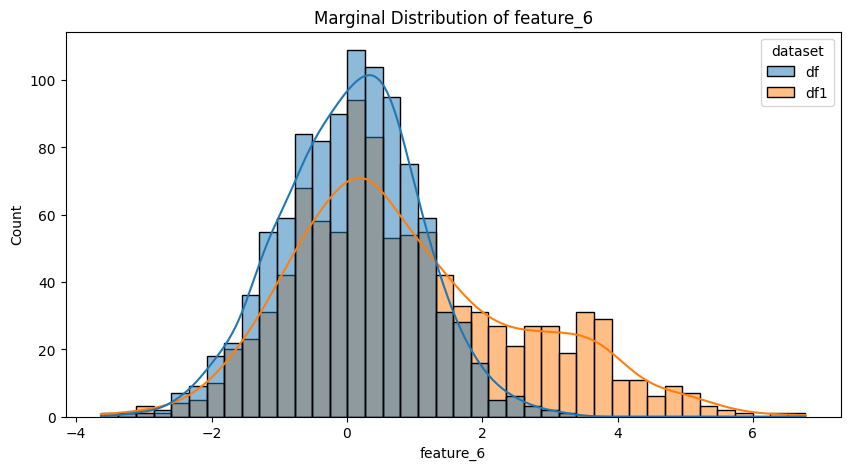

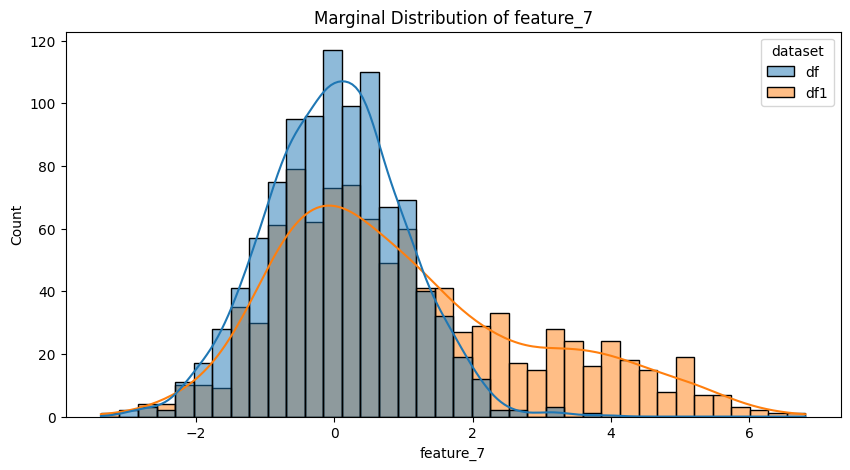

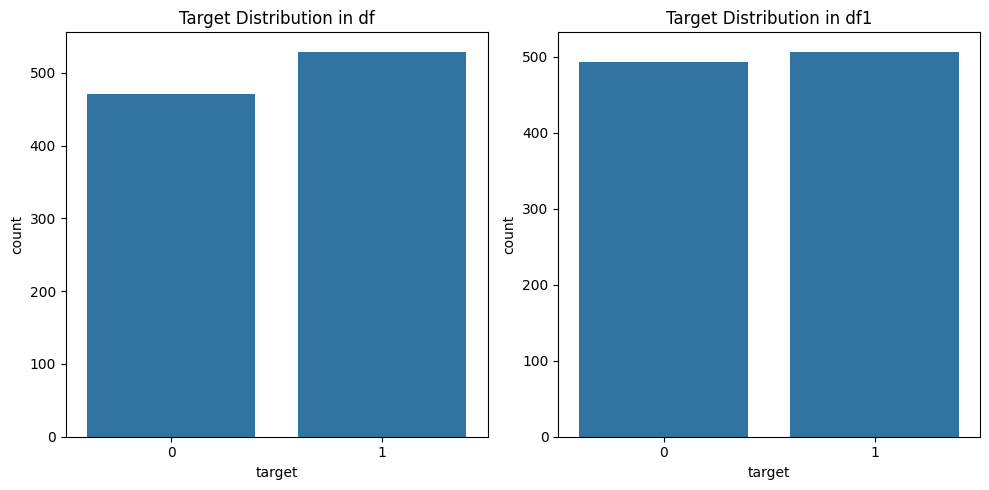

Descriptive statistics for df:
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.005105    -0.020263     0.021551    -0.028707    -0.065911   
std       0.998626     1.020223     1.001217     1.013059     1.001289   
min      -3.170426    -3.019512    -2.921350    -3.241267    -2.940389   
25%      -0.671087    -0.661100    -0.653363    -0.737420    -0.716266   
50%       0.002934    -0.030351     0.021995    -0.041314    -0.096668   
75%       0.648475     0.652821     0.712824     0.643030     0.597575   
max       3.098299     2.985259     3.109919     3.529055     3.926238   

         feature_6    feature_7       target  
count  1000.000000  1000.000000  1000.000000  
mean      0.040487     0.011064     0.529000  
std       1.003571     0.976235     0.499408  
min      -3.176704    -2.899514     0.000000  
25%      -0.631029    -0.646979     0.000000  
50%       0.090667  

In [ ]:
# Concatenate the two dataframes
df_concat = pd.concat([df.assign(dataset='df'), df1.assign(dataset='df1')])

# Plotting the marginal distributions of all the features of df and df1
for i in range(7):
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df_concat, x=f'feature_{i+1}', hue='dataset', kde=True)
  plt.title(f'Marginal Distribution of feature_{i+1}')
  plt.show()

# Compare the target variables
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='target')
plt.title('Target Distribution in df')

plt.subplot(1, 2, 2)
sns.countplot(data=df1, x='target')
plt.title('Target Distribution in df1')
plt.tight_layout()
plt.show()

# Display the descriptive statistics of all the features
print("Descriptive statistics for df:")
print(df.describe())

print("\nDescriptive statistics for df1:")
print(df1.describe())

In [ ]:
df.to_csv('df.csv', index=False)
df1.to_csv('df1.csv', index=False)

multinormali traslazione + rotazione

da sistemare ->
1. matrice di covarianza non semidefinita positiva dopo la rotazione
2. vettore mu con valori diversi



In [4]:
# Generate a 7x7 positive semidefinite symmetric matrix
matrix_size = 7
# Method 1: Using random orthogonal matrix
A = np.random.rand(matrix_size, matrix_size)
# Ensure positive semidefinite by taking the outer product of a random vector
positive_definite_matrix = np.dot(A, A.transpose())
print(positive_definite_matrix)

[[2.02577157 2.27199182 1.69034229 1.60945064 1.81971213 1.24517079
  1.12348007]
 [2.27199182 3.05135089 2.14359833 2.14781909 1.91090241 2.09496151
  1.43301253]
 [1.69034229 2.14359833 2.01750949 1.380972   1.84764243 1.58220978
  1.08598468]
 [1.60945064 2.14781909 1.380972   1.64042485 1.30228192 1.35100821
  0.98954966]
 [1.81971213 1.91090241 1.84764243 1.30228192 2.16061651 1.21478322
  1.01797557]
 [1.24517079 2.09496151 1.58220978 1.35100821 1.21478322 2.12779056
  0.95092182]
 [1.12348007 1.43301253 1.08598468 0.98954966 1.01797557 0.95092182
  0.80770175]]


In [5]:
# Generate a random orthogonal matrix
from scipy.stats import ortho_group

# Generate a random orthogonal matrix
random_orthogonal_matrix = ortho_group.rvs(dim=7)

# Rotate the positive definite matrix
rotated_matrix = np.dot(random_orthogonal_matrix, np.dot(positive_definite_matrix, random_orthogonal_matrix.T))

print(rotated_matrix)

# Verification (optional): Check if the rotated matrix is still positive definite
eigenvalues = np.linalg.eigvals(rotated_matrix)
print(f"Eigenvalues of the rotated matrix: {eigenvalues}")  # All eigenvalues should be non-negative for positive semi-definiteness

[[ 2.236413   -1.65126136 -2.41061192 -1.94860555 -0.15502617 -0.63792725
  -2.30268919]
 [-1.65126136  2.33905975  2.0437689   1.54846023  0.28220914  0.8743032
   2.05931354]
 [-2.41061192  2.0437689   2.94704717  2.17866349  0.0369841   0.73143679
   2.96694768]
 [-1.94860555  1.54846023  2.17866349  1.851946    0.13336145  0.53314911
   2.21961377]
 [-0.15502617  0.28220914  0.0369841   0.13336145  0.37407226  0.10834301
  -0.24057853]
 [-0.63792725  0.8743032   0.73143679  0.53314911  0.10834301  0.38066959
   0.75342566]
 [-2.30268919  2.05931354  2.96694768  2.21961377 -0.24057853  0.75342566
   3.70195785]]
Eigenvalues of the rotated matrix: [1.15773733e+01 1.14303907e+00 7.38292382e-01 5.89477538e-03
 1.69456445e-01 1.10253869e-01 8.68557414e-02]


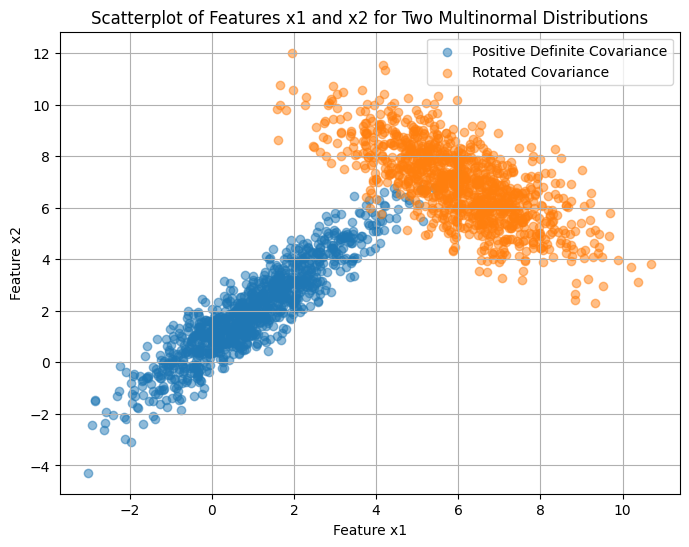

In [26]:
mean = [1,2,3,4,5,6,7]
mean_rot = [x + 5 for x in mean]

# Generate samples from the two multinormal distributions
samples_positive_definite = np.random.multivariate_normal(mean, positive_definite_matrix, N)
samples_rotated = np.random.multivariate_normal(mean_rot, rotated_matrix, N)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(samples_positive_definite[:, 0], samples_positive_definite[:, 1], label='Positive Definite Covariance', alpha=0.5)
plt.scatter(samples_rotated[:, 0], samples_rotated[:, 1], label='Rotated Covariance', alpha=0.5)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('Scatterplot of Features x1 and x2 for Two Multinormal Distributions')
plt.legend()
plt.grid(True)
plt.show()